# Data Scientist Jobs Analysis in Netherlands
## 1. Introduction
In this project I have collected all the jobs that were posted on Indeed.nl by scraping the content of their website.

In [1]:
import requests
import os
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import time
import datetime
import json
import wptools # Wikipedia's API tool
import seaborn as sns

## 2. Data Gathering
The data is gathered by using the BeautifulSoup library and scraping the data of Indeed.nl. To get information about each company similar task is performed by scraping the data from Indeed.com.

### 2.1 Data Gathering: extracting the job details

In [120]:
# URL for indeed website
URL= 'https://www.indeed.com/jobs?q=data+scientist&start=0'
response= requests.get(URL)
response

<Response [200]>

In [122]:
# Beautiful soup to extract the HTML content
soup= BeautifulSoup(response.content, 'html.parser')

In [20]:
# Function for returning the title of the job
def job_title_func(x):
    """Return the job title in the soup element
    Input: job in the page to be scraped
    Output: Job Title"""
    try:
        my_return = re.findall('title="[\w\W]+"',str(soup.find_all('a',class_="jobtitle turnstileLink")[x]))[0][7:-1]
    except:
        my_return= None
        
    return my_return

In [21]:
# Comapny name
def company_name_func(x):
    """Return the company name in the soup element
    Input: job in the page to be scraped
    Output: Company name"""
    try:
        my_return = soup.find_all('span', class_='company')[x].find('a').contents[0][1:]
    except:
        try:
            my_return= soup.find_all('span', class_='company')[x].contents[0][1:]
        except:
            my_return= None
        
    return my_return

In [22]:
# Job location function
def location_func(x):
    """Return the job location in the soup element
    Input: job in the page to be scraped
    Output: Job Location"""
    try:
        my_return = soup.find_all('span',class_="location accessible-contrast-color-location" )[x].contents[0]
    except:
        my_return= None
        
    return my_return

In [23]:
# Job date
def date_func(x):
    """Return the job date in the soup element
    Input: job in the page to be scraped
    Output: number of days ago job was posted"""
    try:
        my_return = soup.find_all('span', class_='date')[x].contents[0]
    except:
        my_return= None
        
    return my_return

In [24]:
# Company rating function
def rating_func(x):
    """Return the company rating in the soup element
    Input: job in the page to be scraped
    Output: company rating"""
    try:
        my_return = float(soup.find_all('span', class_='ratingsContent')[x].contents[0][1:].replace(',','.'))
    except:
        my_return= None
        
    return my_return

Scraping the website for all Data Scientists opening in Netherlands.

In [289]:
# Initializing lists to append from the search results
job_title= []
company_name= []
location=[]
job_date= []
company_rating=[]

#Making a loop to scroll through all the pages at Indeed
for i in range(0,751,15):
    URL= 'https://www.indeed.nl/jobs?q=Data+Scientist&l=netherlands&start='+str(i)  # Indeed Netherlands URL
    
    response= requests.get(URL)   
    soup= BeautifulSoup(response.content, 'html.parser') # Using beautiful soup to extract the html elements
    
    page_len= len(soup.find_all('span', class_='company')) # Finding the number of jobs in a page
    
    for x in range(page_len):
        # Extracting different information for each job
        job_title.append(job_title_func(x))   

        company_name.append(company_name_func(x))

        location.append(location_func(x))
        job_date.append(date_func(x))
        company_rating.append(rating_func(x))
    
    # Pausing the next page loading
    time.sleep(np.random.randint(10,25))
    print('Running page ',i/10+1)

# Making a dataframe with the above lists
df= pd.DataFrame({'job_title':job_title,'company_name':company_name,'location':location,'job_date':job_date, \
                 'company_rating':company_rating})

# Exporting the dataframe to a csv file
df.to_csv(r'C:\Users\srini\Projects\LinkedIn\Indeed.csv',)
df.shape

Running page  1.0
Running page  2.0
Running page  3.0
Running page  4.0
Running page  5.0
Running page  6.0
Running page  7.0
Running page  8.0
Running page  9.0
Running page  10.0
Running page  11.0
Running page  12.0
Running page  13.0
Running page  14.0
Running page  15.0
Running page  16.0
Running page  17.0
Running page  18.0
Running page  19.0
Running page  20.0
Running page  21.0
Running page  22.0
Running page  23.0
Running page  24.0
Running page  25.0
Running page  26.0
Running page  27.0
Running page  28.0
Running page  29.0
Running page  30.0
Running page  31.0
Running page  32.0
Running page  33.0
Running page  34.0
Running page  35.0
Running page  36.0
Running page  37.0
Running page  38.0
Running page  39.0
Running page  40.0
Running page  41.0
Running page  42.0
Running page  43.0
Running page  44.0
Running page  45.0
Running page  46.0
Running page  47.0
Running page  48.0
Running page  49.0
Running page  50.0
Running page  51.0
Running page  52.0
Running page  53.0
Ru

(1230, 5)

In [159]:
# importing the data from the csv file
df= pd.read_csv(r'C:\Users\srini\Projects\LinkedIn\Indeed.csv')
df.drop(columns='Unnamed: 0', inplace= True) # for dropping the index column
df.head(1)

,job_title,company_name,location,job_date,company_rating
0,Senior Data Scientist,ABN AMRO Bank,Amsterdam,Vandaag,4.1


### 2.2 Data Gathering for company information
To gather information about the companies like Headquarter location, industry domain etc we will scrap that data from Indeed's webpage.

In [97]:
# creating a function to extract company info from Indeed's soup element
def company_info_indeed(soup):
    """Returns the information about the industry, HeadQuarter, employee number and revenue
    for each company
    Input: soup element
    output: industry, HeadQuarter, employee number and revenue"""
    try:
        industry= soup.find_all('div', class_="cmp-AboutMetadata-itemCotent")[2].find('a').contents[0]
    except:
        industry= None
    try:
        hq= soup.find_all('div', class_="cmp-AboutMetadata-itemCotent")[0].contents[0]
    except:
        hq= None
    try:
        employee = soup.find_all('div', class_="cmp-AboutMetadata-itemCotent")[1].contents[0]
    except:
        employee= None
    try:
        revenue= soup.find_all('div', class_="cmp-AboutMetadata-itemCotent")[3].contents[0]
    except:
        revenue= None
    return industry, hq,employee, revenue

In [110]:
# finding all the company names that posted more than 1 job
company_name_more2= df.company_name.value_counts()[df.company_name.value_counts()>1].index

df.company_name.apply(lambda x: x in company_name_more2 ).sum()

752

In [116]:
# Scraping the information from Indeed's URL
industry_list=[]
hq_list= []
employee_list= []
revenue_list= []
company_name_list= []
count=0

for x in company_name_more2:
    count+=1
    print('Running page: ',count)
    url_company= 'https://www.indeed.com/cmp/'+ x.lower().replace(' ','-') # URL for the indeed company page
    
    try:
        response= requests.get(url_company)
        soup= BeautifulSoup(response.content)
        
    except:
        continue
    
    industry, hq,employee, revenue = company_info_indeed(soup)
    
    company_name_list.append(x)
    industry_list.append(industry)
    hq_list.append(hq)
    employee_list.append(employee)
    revenue_list.append(revenue)
    
    time.sleep(np.random.randint(5,15))
    
    
company_info= pd.DataFrame({'company_name':company_name_list, 'industry':industry_list,'hq':hq_list,\
                            'employee_num':employee_list,'revenue':revenue_list})
company_info.shape

Running page:  1
Running page:  2
Running page:  3
Running page:  4
Running page:  5
Running page:  6
Running page:  7
Running page:  8
Running page:  9
Running page:  10
Running page:  11
Running page:  12
Running page:  13
Running page:  14
Running page:  15
Running page:  16
Running page:  17
Running page:  18
Running page:  19
Running page:  20
Running page:  21
Running page:  22
Running page:  23
Running page:  24
Running page:  25
Running page:  26
Running page:  27
Running page:  28
Running page:  29
Running page:  30
Running page:  31
Running page:  32
Running page:  33
Running page:  34
Running page:  35
Running page:  36
Running page:  37
Running page:  38
Running page:  39
Running page:  40
Running page:  41
Running page:  42
Running page:  43
Running page:  44
Running page:  45
Running page:  46
Running page:  47
Running page:  48
Running page:  49
Running page:  50
Running page:  51
Running page:  52
Running page:  53
Running page:  54
Running page:  55
Running page:  56
R

(174, 5)

In [118]:
# Exporting the company info data to a csv file
company_info.to_csv(r'C:\Users\srini\Projects\LinkedIn\Company_info2.csv', index= False)

In [124]:
company_info.head()

,company_name,industry,hq,employee_num,revenue
0,AnalysePeople,None,Amsterdam,[AnalysePeople website],None
1,ABN AMRO Bank,Banks and Financial Services,"Gustav Mahlerlaan 10\r\n1082 PP, Amsterdam","10,000+",more than $10B (USD)
2,Essent,Energy and Utilities,"Willemsplein 4, 5211 AK 's-Hertogenbosch","1,001 to 5,000",$5M to $25M (USD)
3,Orange Quarter,Orange Quarter website,Amsterdam (Nederland),11 to 50,None
4,Yacht,None,Diemermere 25\r\n1112 TC Diemen\r\n,[Twitter],None


In [137]:
# Finding the companies which do not have any information extracted

company_info[company_info.isna().sum(axis=1)==4].shape

(54, 5)

In [143]:
# finding missing values in each column
company_info.isna().sum()

company_name     0
industry        76
hq              54
employee_num    58
revenue         97
dtype: int64

So there are a total of 54 companies where none of the company information could be extracted. However, further 22 companies did not have the industry category mentioned. <br>
There are also several categories that have Twitter link or the company website mentioned in the industry category. These need to be manually scraped.

In [152]:
# finding all the company names that posted exactly 1 job
company_name_equal1= df.company_name.value_counts()[df.company_name.value_counts()==1].index
company_name_equal1.shape

(97,)

In [154]:
# Scraping the information from Indeed's URL
industry_list=[]
hq_list= []
employee_list= []
revenue_list= []
company_name_list= []
count=0

for x in company_name_equal1:
    count+=1
    print('Running page: ',count)
    url_company= 'https://www.indeed.com/cmp/'+ x.lower().replace(' ','-') # URL for the indeed company page
    
    try:
        response= requests.get(url_company)
        soup= BeautifulSoup(response.content)
        
    except:
        continue
    
    industry, hq,employee, revenue = company_info_indeed(soup)
    
    company_name_list.append(x)
    industry_list.append(industry)
    hq_list.append(hq)
    employee_list.append(employee)
    revenue_list.append(revenue)
    
    time.sleep(np.random.randint(5,15))
    
    
company_info3= pd.DataFrame({'company_name':company_name_list, 'industry':industry_list,'hq':hq_list,\
                            'employee_num':employee_list,'revenue':revenue_list})

# Exporting the company info data to a csv file
company_info3.to_csv(r'C:\Users\srini\Projects\LinkedIn\Company_info3.csv', index= False)
company_info3.shape

Running page:  1
Running page:  2
Running page:  3
Running page:  4
Running page:  5
Running page:  6
Running page:  7
Running page:  8
Running page:  9
Running page:  10
Running page:  11
Running page:  12
Running page:  13
Running page:  14
Running page:  15
Running page:  16
Running page:  17
Running page:  18
Running page:  19
Running page:  20
Running page:  21
Running page:  22
Running page:  23
Running page:  24
Running page:  25
Running page:  26
Running page:  27
Running page:  28
Running page:  29
Running page:  30
Running page:  31
Running page:  32
Running page:  33
Running page:  34
Running page:  35
Running page:  36
Running page:  37
Running page:  38
Running page:  39
Running page:  40
Running page:  41
Running page:  42
Running page:  43
Running page:  44
Running page:  45
Running page:  46
Running page:  47
Running page:  48
Running page:  49
Running page:  50
Running page:  51
Running page:  52
Running page:  53
Running page:  54
Running page:  55
Running page:  56
R

(97, 5)

I manually scraped the missing values from the company information by Googling them and visiting their websites. I stored the data in a csv file on my local hard drive.

In [156]:
# Gathering the manually scraped results to form a master sheet for company info
company_info_master= pd.read_csv(r'C:\Users\srini\Projects\LinkedIn\Manual Scrape.csv')
company_info_master.head(3)

,company_name,industry,hq,employee_num,revenue
0,AnalysePeople,Human Resources and Staffing,Netherlands,NaN,NaN
1,ABN AMRO Bank,Banks and Financial Services,Netherlands,"10,000+",more than $10B (USD)
2,Essent,Energy and Utilities,Netherlands,"1,001 to 5,000",$5M to $25M (USD)


In [157]:
# Finding missing values
company_info_master.isna().sum()

company_name      0
industry         26
hq               31
employee_num    208
revenue         160
dtype: int64

In [160]:
# Merging the company info and original dataset together
df= pd.merge(df,company_info_master,on='company_name',how='left', )
df.head()

,job_title,company_name,location,job_date,company_rating,industry,hq,employee_num,revenue
0,Senior Data Scientist,ABN AMRO Bank,Amsterdam,Vandaag,4.1,Banks and Financial Services,Netherlands,"10,000+",more than $10B (USD)
1,Enterprise Data Scientist,Philip Morris International,Nederland,Zojuist geplaatst,4.3,Consumer Goods and Services,Switzerland,"10,000+",more than $10B (USD)
2,DATA SCIENTIST BIOINFORMATICS,TMC,Amsterdam,Meer dan 30 dagen geleden,3.5,Human Resources and Staffing,Netherlands,NaN,"<a class=""cmp-CompanyLink"" data-tn-element=""co..."
3,Data Scientist,Sam Media,Eindhoven,1 dag geleden,4.0,"Media, News and Publishing",Netherlands,NaN,NaN
4,Data Scientist,Infiniot,Utrecht Leidsche Rijn,Meer dan 30 dagen geleden,4.2,Internet and Software,Netherlands,NaN,NaN


## 3. Data Wrangling

In [161]:
df.shape

(1230, 9)

**3.1 Duplicate values**

In [163]:
# Finding duplicate values in the data frame
df.duplicated(subset=['job_title','company_name', 'location']).sum()

374

In [164]:
# Removing these duplicate values
df.drop_duplicates(subset=['job_title','company_name', 'location'], inplace= True)
df.shape

(856, 9)

**3.2 Missing Values**

In [165]:
# Finding missing values
df.isna().sum()

job_title           1
company_name        0
location          153
job_date            0
company_rating    309
industry           35
hq                 41
employee_num      558
revenue           502
dtype: int64

Most of these missing values for company information were not available easily on Indeed website or on Google search. These will be kept as it is.

In [171]:
# Filling the information with missing job title as Data Scientist
df.loc[df[df.job_title.isna()].index,'job_title']= 'Data Scientist'

**3.3 Date of job posting**

In [173]:
# Changing the just posted or posted today to 0 days
df.job_date.replace({'Vandaag':0,'Zojuist geplaatst':0}, inplace= True)

In [175]:
df.job_date.head()

0                            0
1                            0
2    Meer dan 30 dagen geleden
3                1 dag geleden
4    Meer dan 30 dagen geleden
Name: job_date, dtype: object

In [188]:
# Extracting how many days ago job was posted information 
df['posting_date']= df.job_date.apply(lambda x: pd.to_datetime('2020-6-4')- \
                                      datetime.timedelta(days= int(re.findall('\d+',str(x))[0])))
df.head(3)

,job_title,company_name,location,job_date,company_rating,industry,hq,employee_num,revenue,posting_date
0,Senior Data Scientist,ABN AMRO Bank,Amsterdam,0,4.1,Banks and Financial Services,Netherlands,"10,000+",more than $10B (USD),2020-06-04
1,Enterprise Data Scientist,Philip Morris International,Nederland,0,4.3,Consumer Goods and Services,Switzerland,"10,000+",more than $10B (USD),2020-06-04
2,DATA SCIENTIST BIOINFORMATICS,TMC,Amsterdam,Meer dan 30 dagen geleden,3.5,Human Resources and Staffing,Netherlands,NaN,"<a class=""cmp-CompanyLink"" data-tn-element=""co...",2020-05-05


In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 856 entries, 0 to 1212
Data columns (total 10 columns):
job_title         856 non-null object
company_name      856 non-null object
location          703 non-null object
job_date          856 non-null object
company_rating    547 non-null float64
industry          821 non-null object
hq                815 non-null object
employee_num      298 non-null object
revenue           354 non-null object
posting_date      856 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(8)
memory usage: 113.6+ KB


**3.4 Modifying Number of Employee column**

In [191]:
df.employee_num.unique()

array(['10,000+', nan, '1,001 to 5,000', '501 to 1,000',
       '5,001 to 10,000', '201 to 500', '51 to 200', '11 to 50',
       '2 to 10'], dtype=object)

In [195]:
employee_order= pd.api.types.CategoricalDtype(['2 to 10','11 to 50','51 to 200','201 to 500','501 to 1,000',\
                                               '1,001 to 5,000','5,001 to 10,000','10,000+'], ordered= True )

In [200]:
df.employee_num.astype(employee_order)

0              10,000+
1              10,000+
2                  NaN
3                  NaN
4                  NaN
             ...      
1163    1,001 to 5,000
1164         51 to 200
1165               NaN
1181    1,001 to 5,000
1212           10,000+
Name: employee_num, Length: 856, dtype: category
Categories (8, object): [2 to 10 < 11 to 50 < 51 to 200 < 201 to 500 < 501 to 1,000 < 1,001 to 5,000 < 5,001 to 10,000 < 10,000+]

**3.5 Modifying Revenue Column**

In [278]:
df.revenue.value_counts().index[:7]

Index(['more than $10B (USD)', '$100M to $500M (USD)', '$5M to $25M (USD)',
       '$1B to $5B (USD)', 'less than $1M (USD)', '$500M to $1B (USD)',
       '$1M to $5M (USD)', '$25M to $100M (USD)', '$5B to $10B (USD)'],
      dtype='object')

In [214]:
revenue_order= pd.api.types.CategoricalDtype(['less than $1M (USD)','$1M to $5M (USD)','$5M to $25M (USD)',\
'$25M to $100M (USD)','$100M to $500M (USD)','$500M to $1B (USD)','$1B to $5B (USD)','$5B to $10B (USD)',\
                                              'more than $10B (USD)'], ordered= True)
df.revenue.astype(revenue_order)

0       more than $10B (USD)
1       more than $10B (USD)
2                        NaN
3                        NaN
4                        NaN
                ...         
1163       $5M to $25M (USD)
1164                     NaN
1165                     NaN
1181       $5M to $25M (USD)
1212    more than $10B (USD)
Name: revenue, Length: 856, dtype: category
Categories (9, object): [less than $1M (USD) < $1M to $5M (USD) < $5M to $25M (USD) < $25M to $100M (USD) ... $500M to $1B (USD) < $1B to $5B (USD) < $5B to $10B (USD) < more than $10B (USD)]

In [276]:
# Removing all the hyperlinks from the Revenue columns
revenue_list= ['less than $1M (USD)','$1M to $5M (USD)','$5M to $25M (USD)',\
'$25M to $100M (USD)','$100M to $500M (USD)','$500M to $1B (USD)','$1B to $5B (USD)','$5B to $10B (USD)',\
                                              'more than $10B (USD)']
df.revenue= df.revenue.apply(lambda x: x if x in revenue_list else None)

In [277]:
df.revenue.value_counts()

more than $10B (USD)    58
$100M to $500M (USD)    51
$5M to $25M (USD)       39
$1B to $5B (USD)        30
less than $1M (USD)     14
$500M to $1B (USD)      10
$1M to $5M (USD)        10
$25M to $100M (USD)      8
$5B to $10B (USD)        6
Name: revenue, dtype: int64

**3.6 Futher exploration of data**

In [216]:
# Finding different job locations
df.location.unique()

array(['Amsterdam', 'Nederland', 'Eindhoven', 'Utrecht Leidsche Rijn',
       'Breda', 'Utrecht', 'Rotterdam', 'Den Haag', 'Middelburg', nan,
       'Amsterdam Centrum', 'Noordwijk', 'Groningen', 'Delft', 'Delden',
       'Twente', 'Oirschot', 'Elst', 'Leiden', 'Schiedam', 'Zwolle',
       'Nieuwegein', 'Leeuwarden', 'Deventer', 'Sittard',
       'Amsterdam Zuid', 'Rijswijk', 'Bergschenhoek', 'Diemen',
       'Zuid-Holland', 'Amsterdam Westpoort', 'Zaltbommel',
       'Utrecht Binnenstad', 'Noord-Brabant', 'Utrecht Oost',
       'Wageningen', 'Limburg', 'Badhoevedorp', 'Driebergen', 'Hoofddorp',
       'Amersfoort', 'Tilburg', 'Amsterdam Oost', 'Zwijndrecht',
       'Den Bosch', 'De Lier', 'Gorinchem', 'Veldhoven', 'Nijmegen',
       'Zaandam', 'Rotterdam Centrum', 'Maasdijk', 'Haarlem',
       'Amsterdam-Zuidoost', 'Amsterdam Nieuw-West', 'Noord-Holland',
       'Varsseveld', 'Soest', 'Aarle-Rixtel', 'Zutphen', 'Leusden',
       'Zeist', 'Enschede', 'Maassluis', 'Naarden', 'Hilversum'

**3.7 Categorizing job role by seniority levels**

In [218]:
# different job title
df.job_title.unique()

array(['Senior Data Scientist', 'Enterprise Data Scientist',
       'DATA SCIENTIST BIOINFORMATICS', 'Data Scientist',
       'junior Data Scientist en junior onderzoeker',
       'Disease Monitoring Scientist',
       'Junior/Medior Data Scientist | Logistics | Utrecht',
       'Data Scientist / Advanced Data Analyst', 'SENIOR DATA SCIENTIST',
       '6 Data Scientists (jr/mr/sr)– Telecom',
       'Parttime Data Analist/Scientist GEO', 'Data Scientist Powerhouse',
       'Computer Scientist', 'Data scientist',
       'Junior Scientist Vector Development',
       'Data Analist C+ Activation', 'Data Scientist I',
       'Medior/Senior Data Scientist | EMEA | The Hague',
       'Junior Data Scientist', 'Machine learning engineer',
       'Data Scientist - Freelance', 'Scientist, Infectious Diseases',
       'Scientist',
       '2 Data Scientists for the Behavioural Data Science Incubator',
       'Data Scientist – Energie – Rotterdam',
       'Data Scientist Planning and Forecasting',
  

In [261]:
# keywords associated with seniority category

senior_title= ['senior', 'principal', 'staff', 'manager', 'professor','head of', 'phd', 'postdoc', 'lead', 'specialist',\
              'architect']
junior_title= ['junior', 'jr', 'associate','assistant' ]

# Function to find if a seniority keyword is in the job title
def seniority_func(element):
    """ Finds if the seniority keywords are in the job title"""
        
    for i in senior_title:
        if i in element:
            return 'senior'
            
    for j in junior_title:
        if j in element:
            return 'junior'

In [262]:
# Defining another column that has the seniority level of the roles
df['seniority']= df.job_title.apply(lambda x: seniority_func(x.lower()))

# Filling the missing values with data scientist title
df.seniority.fillna('mid', inplace= True)

df.seniority.value_counts()

mid       522
senior    288
junior     46
Name: seniority, dtype: int64

**3.8 Categorizing if job belongs to software engineering or data science**

In [265]:
# keywords associated with job role category
ds_title = ['data','analyt','analyst', 'analis', 'machine learning', 'ml','ai','deep','nlp', 'computer vision',\
        'bi', 'intelligence', 'iot', 'tableau','Internet of Things', 'etl']
software_title = ['developer', 'java', 'c++','computer scientist','c#', 'developer', ' it ', 'software', 'devops', 'ux',\
    'stack','backend', 'web dev', '.net', 'html','netwerk engineer', 'cloud','azure', 'algorithm']

# Function to find if the job belongs to data science category       
def role_category(element):
    """ Finds if the job title is Data Science related or software related"""
    for i in software_title:
        if i in element:
            return 'software role'
    for j in ds_title:
        if j in element:
            return 'data science role'

In [266]:
# Defining another column that has the seniority level of the roles
df['role_category']= df.job_title.apply(lambda x: role_category(x.lower()))

# Filling the missing values with data scientist title
df.role_category.fillna('others', inplace= True)

df.role_category.value_counts()

data science role    538
others               175
software role        143
Name: role_category, dtype: int64

In [270]:
# Exploring what other category has
df.query('role_category=="others"').job_title.unique()[:10]

array(['Disease Monitoring Scientist',
       'Junior Scientist Vector Development',
       'Scientist, Infectious Diseases', 'Scientist',
       'Junior scientist structural dynamics | Delft',
       'Scientist Formulation Process Development',
       'Assistant scientist COVID-19 Vaccine production',
       'R&amp;D ENGINEER AND SCIENTIST NL',
       'EXPERIMENTAL PHYSICIST / DEVELOPMENT ENGINEER',
       'Content Marketeer'], dtype=object)

In [291]:
# Storing the cleaned df to the local hard drive for backup
df.to_csv(r'C:\Users\srini\Projects\LinkedIn\Indeed_cleaned.csv', index= False)

So most of the other category have the keywords scientist and hence they came in our Indeed query.

## 4. Exploratory Data Analysis

In [279]:
df.head(3)

,job_title,company_name,location,job_date,company_rating,industry,hq,employee_num,revenue,posting_date,seniority,role_category
0,Senior Data Scientist,ABN AMRO Bank,Amsterdam,0,4.1,Banks and Financial Services,Netherlands,"10,000+",more than $10B (USD),2020-06-04,senior,data science role
1,Enterprise Data Scientist,Philip Morris International,Nederland,0,4.3,Consumer Goods and Services,Switzerland,"10,000+",more than $10B (USD),2020-06-04,mid,data science role
2,DATA SCIENTIST BIOINFORMATICS,TMC,Amsterdam,Meer dan 30 dagen geleden,3.5,Human Resources and Staffing,Netherlands,NaN,None,2020-05-05,mid,data science role


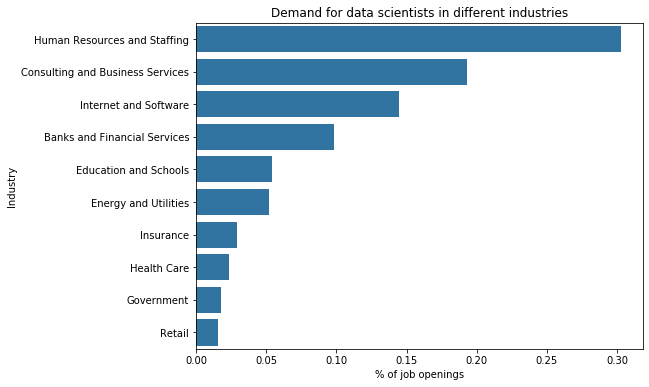

In [304]:
# Finding which industry hires maximum data scientists
s= df.query('role_category=="data science role"').industry.value_counts()
s /= s.sum()
plt.figure(figsize=(8,6))
sns.barplot(x=s.head(10), y= s.head(10).index, color= 'tab:blue')
plt.title('Demand for data scientists in different industries')
plt.xlabel('% of job openings')
plt.ylabel('Industry')
plt.show()

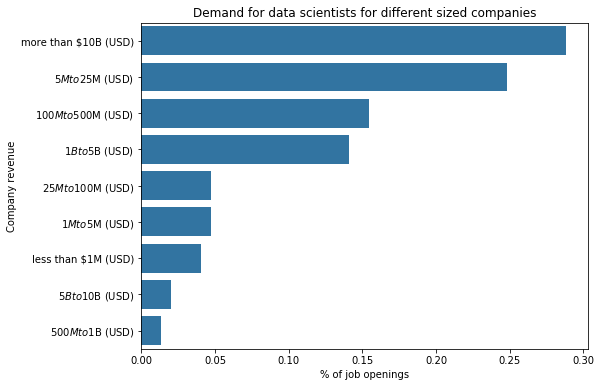

In [299]:
# Finding which industry hires maximum data scientists
s= (df.query('role_category=="data science role"').revenue.value_counts())
s /= s.sum()
plt.figure(figsize=(8,6))
sns.barplot(x=s, y= s.index, color= 'tab:blue')
plt.title('Demand for data scientists for different sized companies')
plt.xlabel('% of job openings')
plt.ylabel('Company revenue')
plt.show()

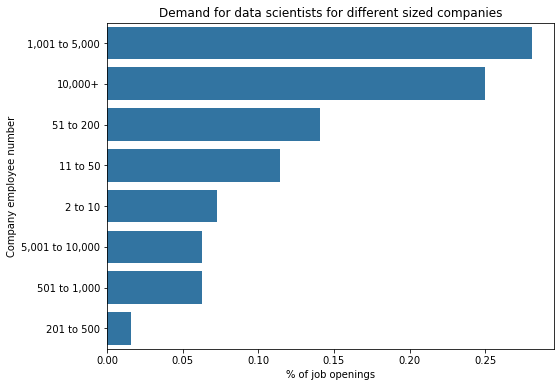

In [301]:
# Finding which industry hires maximum data scientists
s= df.query('role_category=="data science role"').employee_num.value_counts()
s /= s.sum()
plt.figure(figsize=(8,6))
sns.barplot(x=s, y= s.index, color= 'tab:blue')
plt.title('Demand for data scientists for different sized companies')
plt.xlabel('% of job openings')
plt.ylabel('Company employee number')
plt.show()

In [309]:
df.query('role_category=="data science role" & posting_date>"2020-05-05"').groupby(by='posting_date').count()['job_title']

posting_date
2020-05-06     3
2020-05-07     2
2020-05-08     1
2020-05-09     5
2020-05-10    12
2020-05-12     7
2020-05-13     6
2020-05-14    15
2020-05-15     2
2020-05-16     6
2020-05-17     3
2020-05-19     1
2020-05-20    17
2020-05-21     6
2020-05-22     1
2020-05-24     1
2020-05-26     3
2020-05-27    10
2020-05-28    20
2020-05-29    16
2020-05-30    15
2020-05-31     2
2020-06-01     2
2020-06-02     5
2020-06-03     2
2020-06-04    20
Name: job_title, dtype: int64